<a href="https://colab.research.google.com/github/ayush-09/Face-X/blob/master/Face-Mask-Detection/face-mask-detection-using-cnn/Face_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
from keras.models import Sequential
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator,load_img
from keras.layers import Dense, Flatten,Conv2D,Dropout,SeparableConv2D,MaxPooling2D
import matplotlib.pyplot as plt
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np
import os
from imutils import paths
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
path = '/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/dataset'
imagePaths = list(paths.list_images(path))
images = []
labels = []
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = load_img(imagePath, target_size=(224, 224))
	image = img_to_array(image)
	image = preprocess_input(image)
	images.append(image)
	labels.append(label)
images = np.array(images, dtype="float32")
labels = np.array(labels)

In [ ]:
np.unique(labels)

array(['with_mask', 'without_mask'], dtype='<U12')

In [ ]:
encoder = LabelBinarizer()
labels = encoder.fit_transform(labels)
labels = to_categorical(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, labels,
	test_size=0.20, stratify=labels)

In [ ]:
my_new_model = Sequential()
my_new_model.add(Conv2D(32,(7,7),activation='relu',input_shape=(224,224,3)))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.2))
my_new_model.add(Conv2D(64,(5,5),activation='relu'))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.2))

my_new_model.add(Conv2D(32,(3,3),activation='relu'))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.3))

my_new_model.add(Conv2D(16,(3,3),activation='relu'))
my_new_model.add(MaxPooling2D((2,2)))
my_new_model.add(Dropout(0.3))

my_new_model.add(Flatten())
my_new_model.add(Dense(16,activation='relu'))
my_new_model.add(Dropout(0.5))
my_new_model.add(Dense(2, activation='softmax'))
# Indicate whether the first layer should be trained/changed or not.
my_new_model.layers[0].trainable = False  

my_new_model.compile(optimizer='adam', 
                     loss='binary_crossentropy', 
                     metrics=['accuracy'])

In [ ]:
my_new_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)       

In [ ]:
image_size = 224
data_generator = ImageDataGenerator(featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    samplewise_center=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    vertical_flip=False,
    rescale=1.0/255.0,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.2,
    dtype=None)

In [ ]:
batch_size=128
epochs=20
fit_stats = my_new_model.fit(data_generator.flow(X_train, y_train, batch_size=batch_size),
                             steps_per_epoch=len(X_train) // batch_size,
                             validation_data=(X_test, y_test),
                             validation_steps=len(X_test) // batch_size,
                             epochs=epochs)


Epoch 1/20


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


8/8 [==============================] - 113s 14s/step - loss: 0.6980 - accuracy: 0.5082 - val_loss: 3.2434 - val_accuracy: 0.6522
Epoch 2/20
8/8 [==============================] - 114s 14s/step - loss: 0.6300 - accuracy: 0.6430 - val_loss: 3.9041 - val_accuracy: 0.7319
Epoch 3/20
8/8 [==============================] - 116s 14s/step - loss: 0.5270 - accuracy: 0.7510 - val_loss: 1.3478 - val_accuracy: 0.9022
Epoch 4/20
8/8 [==============================] - 111s 14s/step - loss: 0.4213 - accuracy: 0.8251 - val_loss: 1.2225 - val_accuracy: 0.9203
Epoch 5/20
8/8 [==============================] - 112s 14s/step - loss: 0.3362 - accuracy: 0.8848 - val_loss: 0.8489 - val_accuracy: 0.9420
Epoch 6/20
8/8 [==============================] - 111s 14s/step - loss: 0.3115 - accuracy: 0.8930 - val_loss: 0.7780 - val_accuracy: 0.9493
Epoch 7/20
8/8 [==============================] - 110s 14s/step - loss: 0.2783 - accuracy: 0.9084 - val_loss: 0.5557 - val_accuracy: 0.9638
Epoch 8/20
8/8 [===============

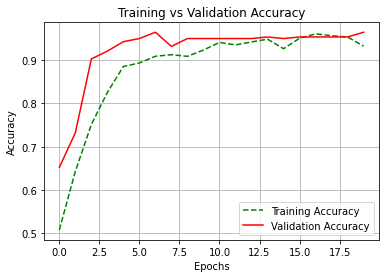

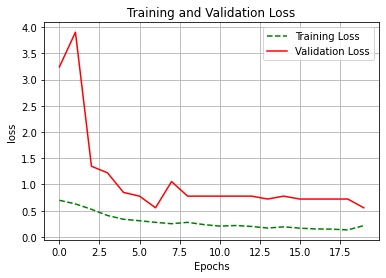

In [ ]:
plt.plot(fit_stats.history['accuracy'],'g--',label='Training Accuracy')
plt.plot(fit_stats.history['val_accuracy'],'r',label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()
plt.plot(fit_stats.history['loss'],'g--',label='Training Loss')
plt.plot(fit_stats.history['val_loss'],'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
y_pred = my_new_model.predict(X_test, batch_size=batch_size)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(y_test.argmax(axis=1), y_pred, target_names=encoder.classes_))

              precision    recall  f1-score   support

   with_mask       0.94      0.99      0.96       138
without_mask       0.99      0.93      0.96       138

    accuracy                           0.96       276
   macro avg       0.97      0.96      0.96       276
weighted avg       0.97      0.96      0.96       276



In [ ]:
y_train

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.

In [ ]:
my_new_model_name = 'Mask_detector_model.h5'
my_new_model.save(my_new_model_name)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, mean_absolute_error, precision_score, recall_score
cf_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)
print('Confusion matrix report of the model : \n{}'.format(cf_matrix))

Confusion matrix report of the model : 
[[137   1]
 [  9 129]]


<Figure size 432x288 with 0 Axes>

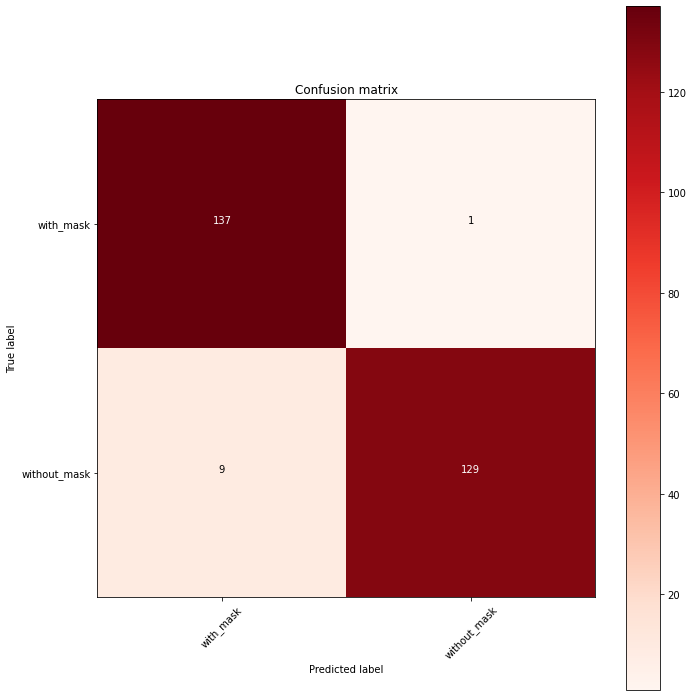

In [ ]:
import itertools

def plot_confusion_matrix(cf_matrix, classes, title='Confusion matrix', cmap=plt.cm.Blues,normalize=True):
    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 10))
    plt.grid(b=False)
    plt.imshow(cf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if class_names is not None:
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names, rotation=45)
        plt.yticks(tick_marks, class_names)
    if normalize:
        cf_matrix = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
    
    thresh = cf_matrix.max() / 1.5 if normalize else cf_matrix.max() / 2
    for i, j in itertools.product(range(cf_matrix.shape[0]), range(cf_matrix.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cf_matrix[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cf_matrix[i, j]),
                     horizontalalignment="center",
                     color="white" if cf_matrix[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1),y_pred)
np.set_printoptions(precision=np.random.randint(0,9))

# plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=False ,title='Confusion matrix',cmap='Reds')
plt.show()

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform

with CustomObjectScope({'GlorotUniform': glorot_uniform()}):
        model = load_model("/content/Mask_detector_model.h5")

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 218, 218, 32)      4736      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 109, 109, 32)      0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 109, 109, 32)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 105, 105, 64)      51264     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 52, 52, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 52, 52, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 50, 50, 32)       

In [ ]:
image=cv2.imread('/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/41698.jpg')

In [ ]:
prototxtPath = '/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/face_detector/deploy.prototxt'
weightsPath = '/content/gdrive/My Drive/ANN project/face-mask-detector-master/resources/face_detector/res10_300x300_ssd_iter_140000.caffemodel'
face_model = cv2.dnn.readNet(prototxtPath, weightsPath)

In [ ]:
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300), (104.0, 177.0, 123.0))
face_model.setInput(blob)
detections=face_model.forward()

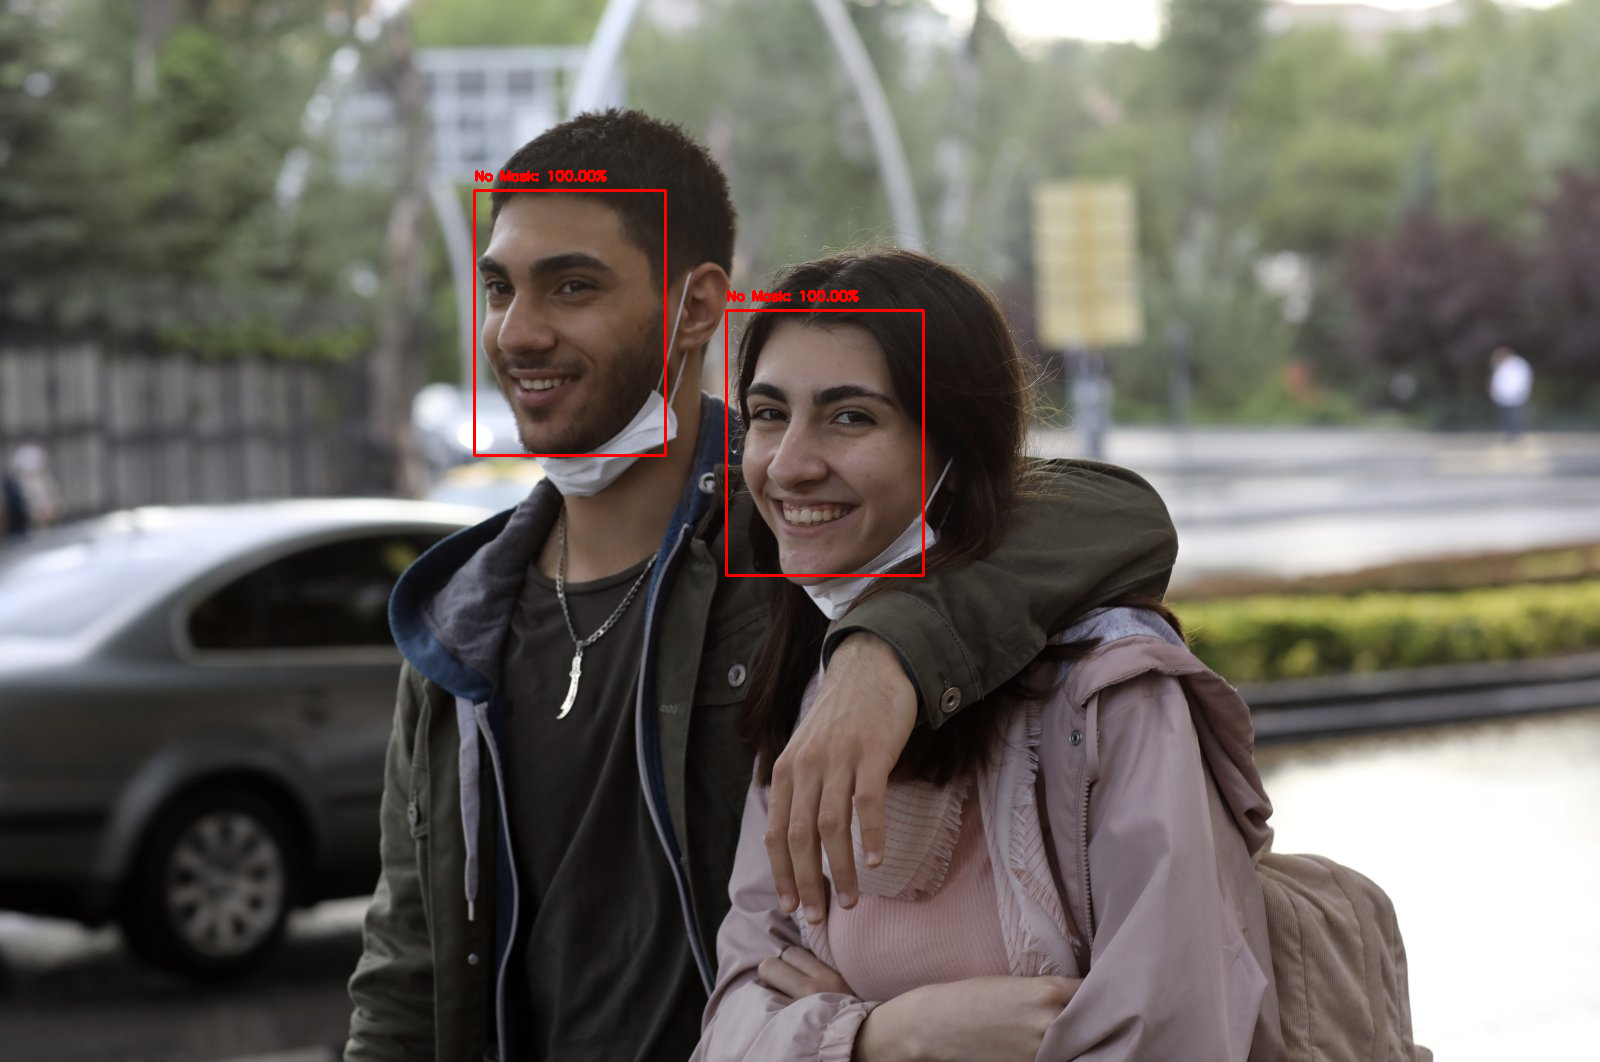

In [ ]:
from google.colab.patches import cv2_imshow
person_with_mask = 0
person_without_mask = 0
for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > 0.5:
        box = detections[0, 0, i, 3:7] * np.array([width, height, width, height])
        (startX, startY, endX, endY) = box.astype("int")
        (startX, startY) = (max(0, startX), max(0, startY))
        (endX, endY) = (min(width - 1, endX), min(height - 1, endY))

        face = image[startY:endY, startX:endX]
        face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
        face = cv2.resize(face, (224, 224))
        face = img_to_array(face)
        face = preprocess_input(face)
        face = np.expand_dims(face, axis=0)

        (mask,withoutMask) = model.predict(face)[0]
        label = "Mask" if mask > withoutMask else "No Mask"
        color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

        label = "{}: {:.2f}%".format(label, max(mask,withoutMask) * 100)

        cv2.putText(image, label, (startX, startY - 10),cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
        cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)
cv2_imshow(image)